In [199]:
# importing some necessary library 
import pandas as pd # Data preporcessing
import numpy as np #Lienar algebra
import matplotlib.pyplot as plt #MATLAB style plotting
import seaborn as sns
sns.set(style='darkgrid')
plt.rc('font',size=14)

from scipy import stats
from scipy.stats import norm,skew #Statistics

import warnings #Ignore annoying warning
def ignore_warning(*args,**kwargs):
    pass
warnings.warn = ignore_warning

In [200]:
from subprocess import check_output
print(check_output(['ls','../Big_Mart_Problem/']).decode('utf8'))

Big_mart_solution.ipynb
Test.csv
Train.csv



## Load Train & Test data

In [201]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [202]:
#Dislpay first five rows Trainnig dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [203]:
#Dislpay first five rows Test dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [204]:
train.shape

(8523, 12)

In [205]:
test.shape

(5681, 11)

## Variable Identification

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [208]:
train.get_dtype_counts()

float64    4
int64      1
object     7
dtype: int64

## Summary of dataset

In [209]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [210]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [211]:
y_train = train.Item_Outlet_Sales

In [212]:
n_train = train.shape[0]
n_test = test.shape[0]
print(n_train,n_test)

8523 5681


In [213]:
data = pd.concat(objs = (train,test)).reset_index(drop=True)

## Numerical and Categorical features


In [214]:
categorical_feats = data.dtypes[data.dtypes == "object"].index
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Categorical Features %d"%(len(categorical_feats)))
print("Number of Numerical Features %d"%(len(numerical_feats)))

Number of Categorical Features 7
Number of Numerical Features 5


In [215]:
print("Categorical Features :-")
print(data[categorical_feats].columns)
print("*"*100)
print("Numerical Features :- ")
print(data[numerical_feats].columns)

Categorical Features :-
Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')
****************************************************************************************************
Numerical Features :- 
Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')


In [216]:
data[categorical_feats].head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1


In [217]:
data[numerical_feats].head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009
2,141.6180,2097.2700,0.016760,17.50,1999
3,182.0950,732.3800,0.000000,19.20,1998
4,53.8614,994.7052,0.000000,8.93,1987


## Feature with missing values

In [218]:
percent = data.isnull().sum()/len(data)*100
total = data.isnull().sum()

In [219]:
data_na_ratio = pd.concat(objs=[total,percent],axis=1,keys=['Total','Percent']).sort_values(by='Total',ascending=False)

In [220]:
data_na_ratio = data_na_ratio.drop(data_na_ratio[data_na_ratio['Total']==0].index)
data_na_ratio

,Total,Percent
Item_Outlet_Sales,5681,39.995776
Outlet_Size,4016,28.273726
Item_Weight,2439,17.171219


Text(0,0.5,'Percent of null value by feature')

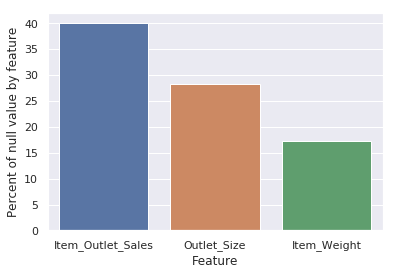

In [221]:
sns.barplot(x=data_na_ratio.index,y=data_na_ratio['Percent'])
plt.xlabel('Feature')
plt.ylabel('Percent of null value by feature')


## Filling missing values


In [222]:
data[categorical_feats] = data[categorical_feats].fillna(value=data[categorical_feats].mode())

In [223]:
d = numerical_feats!='Item_Outlet_Sales'

In [224]:
data[numerical_feats[d]] = data[numerical_feats[d]].fillna(value=data[numerical_feats[d]].mean())

In [225]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [226]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(value='Medium')

In [227]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

In [228]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [230]:
numerical_feats


Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')

In [231]:
categorical_feats

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

## Univariate analysis


categorical features('Item_Fat_Content', 'Item_Type',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type')

Low Fat    0.597367
Regular    0.339623
LF         0.036750
reg        0.013729
low fat    0.012532
Name: Item_Fat_Content, dtype: float64


Text(0.5,1,'Frequancy for Item_Fat_Content')

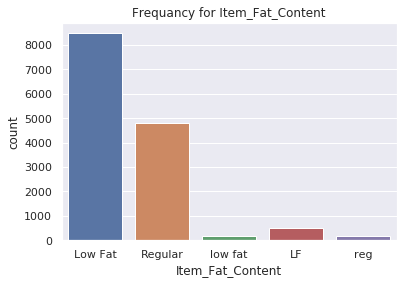

In [232]:
#item_fat_content
print(data['Item_Fat_Content'].value_counts(normalize=True))
sns.countplot(x='Item_Fat_Content',data=data)
plt.title('Frequancy for Item_Fat_Content')


Fruits and Vegetables    0.141721
Snack Foods              0.140031
Household                0.108983
Frozen Foods             0.100394
Dairy                    0.079977
Baking Goods             0.076457
Canned                   0.076317
Health and Hygiene       0.060406
Meat                     0.051816
Soft Drinks              0.051112
Breads                   0.029288
Hard Drinks              0.025486
Others                   0.019713
Starchy Foods            0.018938
Breakfast                0.013095
Seafood                  0.006266
Name: Item_Type, dtype: float64


Text(0.5,1,'Frequancy for Item_Type')

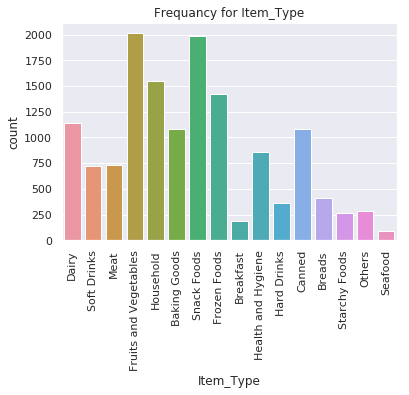

In [233]:
#Item_Type
print(data['Item_Type'].value_counts(normalize=True))
sns.countplot(x='Item_Type',data=data)
plt.xticks(rotation='90')
plt.title('Frequancy for Item_Type')

Supermarket Type1    0.654323
Grocery Store        0.127077
Supermarket Type3    0.109758
Supermarket Type2    0.108843
Name: Outlet_Type, dtype: float64


Text(0.5,1,'Frequancy for Outlet_Type')

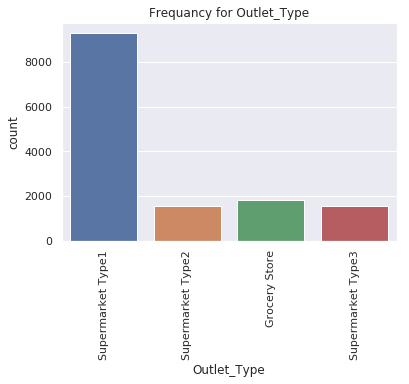

In [234]:
#Outlet_Type
print(data['Outlet_Type'].value_counts(normalize=True))
sns.countplot(x='Outlet_Type',data=data)
plt.xticks(rotation='90')
plt.title('Frequancy for Outlet_Type')

Tier 3    0.393058
Tier 2    0.326739
Tier 1    0.280203
Name: Outlet_Location_Type, dtype: float64


Text(0.5,1,'Frequancy for Outlet_Location_Type')

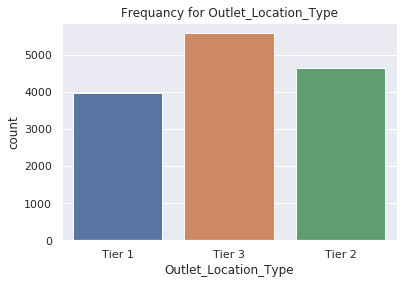

In [235]:
#Item_Type
print(data['Outlet_Location_Type'].value_counts(normalize=True))
sns.countplot(x='Outlet_Location_Type',data=data)
plt.title('Frequancy for Outlet_Location_Type')

Medium    0.610462
Small     0.280203
High      0.109335
Name: Outlet_Size, dtype: float64


Text(0.5,1,'Frequancy for Outlet_Size')

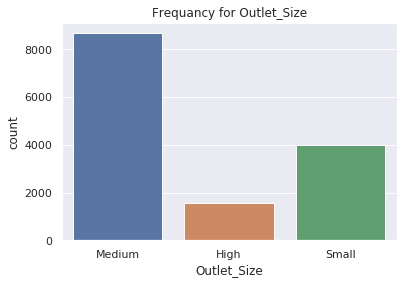

In [236]:
#Outlet_Size
print(data['Outlet_Size'].value_counts(normalize=True))
sns.countplot(x='Outlet_Size',data=data)
plt.title('Frequancy for Outlet_Size')

univariate analysis for numerical features(Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year')

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

Skewness 0.13072836040225863
Kurtosis -0.8938560053756124


Text(0,0.5,'Frequancy')

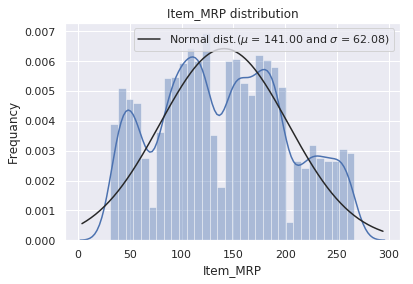

In [237]:
#Item_MRP
print(data['Item_MRP'].describe())
print('\nSkewness {}'.format(data['Item_MRP'].skew()))
print('Kurtosis {}'.format(data['Item_MRP'].kurt()))
sns.distplot(data['Item_MRP'],fit=norm) #unimodal distribution
mu,sigma = norm.fit(data['Item_MRP'])
plt.legend(['Normal dist.($\mu$ = {0:.2f} and $\sigma$ = {1:.2f})'.format(mu,sigma)],loc='best')
plt.title('Item_MRP distribution')
plt.ylabel('Frequancy')

count    14204.000000
mean        12.792854
std          4.234226
min          4.555000
25%          9.300000
50%         12.792854
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

Skewness 0.11131389957012323
Kurtosis -0.8606263426534593


Text(0,0.5,'Frequancy')

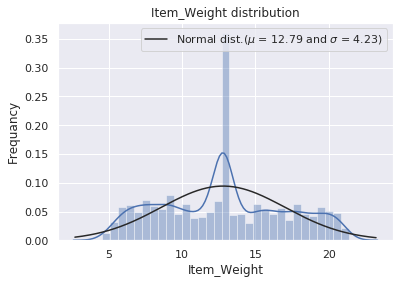

In [238]:
#Item_Weight
print(data['Item_Weight'].describe())
print('\nSkewness {}'.format(data['Item_Weight'].skew()))
print('Kurtosis {}'.format(data['Item_Weight'].kurt()))
sns.distplot(data['Item_Weight'],fit=norm) 
mu,sigma = norm.fit(data['Item_Weight'])
plt.legend(['Normal dist.($\mu$ = {0:.2f} and $\sigma$ = {1:.2f})'.format(mu,sigma)],loc='best')
plt.title('Item_Weight distribution')
plt.ylabel('Frequancy')

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Skewness -0.39646519008637443
Kurtosis -1.2058671747532432


Text(0,0.5,'Frequancy')

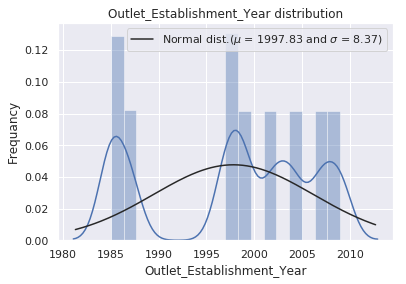

In [239]:
#Outlet_Establishment_Year
print(data['Outlet_Establishment_Year'].describe())
print('\nSkewness {}'.format(data['Outlet_Establishment_Year'].skew()))
print('Kurtosis {}'.format(data['Outlet_Establishment_Year'].kurt()))
sns.distplot(data['Outlet_Establishment_Year'],fit=norm) #unimodal distribution
mu,sigma = norm.fit(data['Outlet_Establishment_Year'])
plt.legend(['Normal dist.($\mu$ = {0:.2f} and $\sigma$ = {1:.2f})'.format(mu,sigma)],loc='best')
plt.title('Outlet_Establishment_Year distribution')
plt.ylabel('Frequancy')

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

Skewness 1.1951751774587889
Kurtosis 1.8200714679841465


Text(0,0.5,'Frequancy')

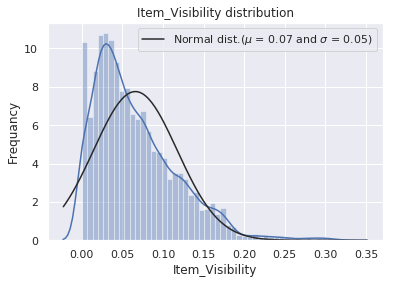

In [240]:
#Item_Visibility
print(data['Item_Visibility'].describe())
print('\nSkewness {}'.format(data['Item_Visibility'].skew()))
print('Kurtosis {}'.format(data['Item_Visibility'].kurt()))
sns.distplot(data['Item_Visibility'],fit=norm) #binomial distribution
mu,sigma = norm.fit(data['Item_Visibility'])
plt.legend(['Normal dist.($\mu$ = {0:.2f} and $\sigma$ = {1:.2f})'.format(mu,sigma)],loc='best')
plt.title('Item_Visibility distribution')
plt.ylabel('Frequancy')

## Target Varible analysis

Skewness : 1.178
Kurtosis: 1.616


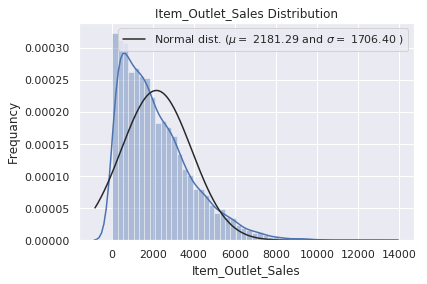

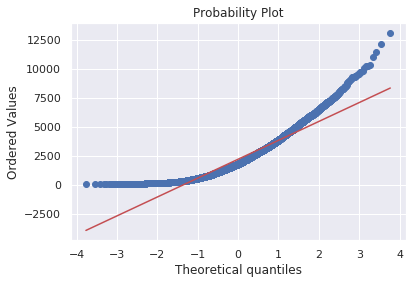

In [241]:
sns.distplot(a=y_train,fit=norm)
print("Skewness : %.3f"%(y_train.skew()))
print("Kurtosis: %.3f"%(y_train.kurt()))
plt.ylabel("Frequancy")
plt.title("Item_Outlet_Sales Distribution")
(mu,sigma) = norm.fit(y_train)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.show()
stats.probplot(x=y_train,plot=plt)
plt.show()

output feature is right skwed therfore, applying log transformation


Skewness : -0.882
Kurtosis: 0.533


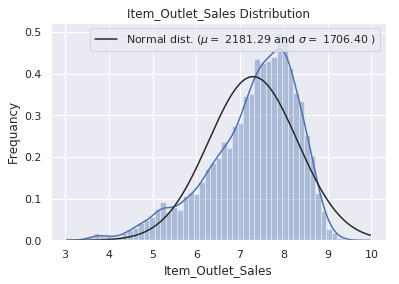

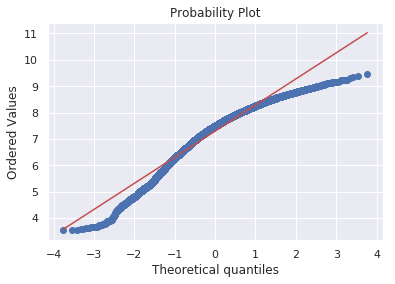

In [242]:
y_log_sales = np.log1p(y_train) #Log transformation
sns.distplot(a=y_log_sales,fit=norm)
print("Skewness : %.3f"%(y_log_sales.skew()))
print("Kurtosis: %.3f"%(y_log_sales.kurt()))
plt.ylabel("Frequancy")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.title("Item_Outlet_Sales Distribution")
(mu,sigma) = norm.fit(y_log_sales)
plt.show()
stats.probplot(x=y_log_sales,plot=plt)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

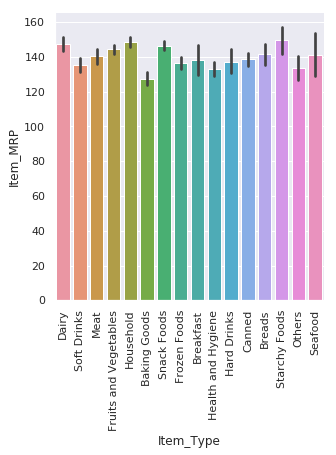

In [243]:
#Categorical to numerical
sns.factorplot(x='Item_Type',y='Item_MRP',data=data,kind='bar')
plt.xticks(rotation='90')

In [244]:
data.groupby('Item_Type').describe()

Item_MRP                                             \
                         count        mean        std      min        25%   
Item_Type                                                                   
Baking Goods            1086.0  127.458237  57.300836  33.4874   86.47835   
Breads                   416.0  141.389849  63.190637  31.9558   93.81860   
Breakfast                186.0  137.985444  56.218724  38.2480   99.03580   
Canned                  1084.0  138.620936  60.162335  35.9506   89.71655   
Dairy                   1136.0  147.230998  70.178385  33.2874   87.94415   
Frozen Foods            1426.0  136.467385  66.597339  31.9558   82.90065   
Fruits and Vegetables   2013.0  144.304237  59.221923  34.8190   99.90160   
Hard Drinks              362.0  137.295031  65.780697  34.2532   74.87880   
Health and Hygiene       858.0  133.108079  59.799825  32.8216   96.66535   
Household               1548.0  148.736501  62.545452  31.9900  106.52140   
Meat                     736.0  140.291141  59.003779  34.5532   98.55420   
Others                   280.0  133.745047  60.733972  34.8190   83.99080   
Seafood                   89.0  141.288751  60.200329  33.7216  108.45960   
Snack Foods             1989.0  146.460309  59.554434  32.3558  104.96220   
Soft Drinks              726.0  135.403726  60.552403  31.2900   85.31320   
Starchy Foods            269.0  149.751917  66.716959  34.0532   92.68040   

                                                     Item_Outlet_Sales  \
                            50%        75%       max             count   
Item_Type                                                                
Baking Goods           117.4124  172.01720  265.5568             648.0   
Breads                 130.1152  193.22940  263.6594             251.0   
Breakfast              152.4682  176.53700  234.9300             110.0   
Canned                 133.2942  184.10095  266.8884             649.0   
Dairy                  146.4273  210.24940  266.6884             682.0   
Frozen Foods           126.1520  188.84770  264.8910             856.0   
Fruits and Vegetables  145.1418  188.08720  264.2252            1232.0   
Hard Drinks            144.3628  179.10810  261.8278             214.0   
Health and Hygiene     129.6468  165.75130  266.6884             520.0   
Household              152.5024  191.10300  264.7910             910.0   
Meat                   142.6312  184.48710  261.5936             425.0   
Others                 132.3284  183.84370  254.9040             169.0   
Seafood                156.9604  185.05820  240.4880              64.0   
Snack Foods            147.4760  186.98980  265.0568            1200.0   
Soft Drinks            145.2286  184.72530  263.5910             445.0   
Starchy Foods          168.6158  194.08200  263.6252             148.0   

                                     ...   Item_Weight         \
                              mean   ...           75%    max   
Item_Type                            ...                        
Baking Goods           1952.971207   ...       15.1500  20.85   
Breads                 2204.132226   ...       13.6500  20.85   
Breakfast              2111.808651   ...       17.0625  21.10   
Canned                 2225.194904   ...       15.7000  21.35   
Dairy                  2232.542597   ...       16.7000  20.70   
Frozen Foods           2132.867744   ...       15.7000  20.85   
Fruits and Vegetables  2289.009592   ...       16.2500  21.35   
Hard Drinks            2139.221622   ...       14.6500  19.70   
Health and Hygiene     2010.000265   ...       16.6000  21.25   
Household              2258.784300   ...       17.1000  21.25   
Meat                   2158.977911   ...       15.7000  21.25   
Others                 1926.139702   ...       16.3500  20.50   
Seafood                2326.065928   ...       17.3500  20.75   
Snack Foods            2277.321739   ...       15.8500  21.25   
Soft Drinks            2006.511735   ...      

In [245]:
data.groupby('Item_Fat_Content').describe()

Item_MRP                                                      \
                    count        mean        std      min       25%       50%   
Item_Fat_Content                                                                
LF                  522.0  138.267925  62.518841  32.0900  93.72650  132.3784   
Low Fat            8485.0  141.454357  61.997603  31.2900  95.84100  142.3496   
Regular            4824.0  140.847488  62.009610  32.0558  91.04880  142.6457   
low fat             178.0  137.128024  65.278549  33.9216  90.79025  141.2141   
reg                 195.0  136.213083  63.841378  32.3558  83.77500  140.0154   

                                      Item_Outlet_Sales                ...    \
                        75%       max             count         mean   ...     
Item_Fat_Content                                                       ...     
LF                182.62855  264.7884             316.0  2073.551928   ...     
Low Fat           185.39240  266.8884            5089.0  2164.477336   ...     
Regular           186.46415  266.8884            2889.0  2235.186702   ...     
low fat           189.50495  265.0884             112.0  2087.740737   ...     
reg               185.05950  261.5936             117.0  1962.192268   ...     

                 Item_Weight        Outlet_Establishment_Year               \
                         75%    max                     count         mean   
Item_Fat_Content                                                             
LF                    16.075  21.25                     522.0  1997.624521   
Low Fat               16.200  21.35                    8485.0  1997.880024   
Regular               15.700  21.20                    4824.0  1997.810945   
low fat               14.150  21.25                     178.0  1996.039326   
reg                   15.600  20.85                     195.0  1998.358974   

                                                                    
                       std     min     25%     50%     75%     max  
Item_Fat_Content                                                    
LF                8.341144  1985.0  1987.0  1999.0  2004.0  2009.0  
Low Fat           8.359693  1985.0  1987.0  1999.0  2004.0  2009.0  
Regular           8.380783  1985.0  1987.0  1999.0  2004.0  2009.0  
low fat           8.903349  1985.0  1985.5  1998.0  2004.0  2009.0  
reg               8.125584  1985.0  1992.0  1999.0  2004.0  2009.0  

[5 rows x 40 columns]

In [246]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


## correlations


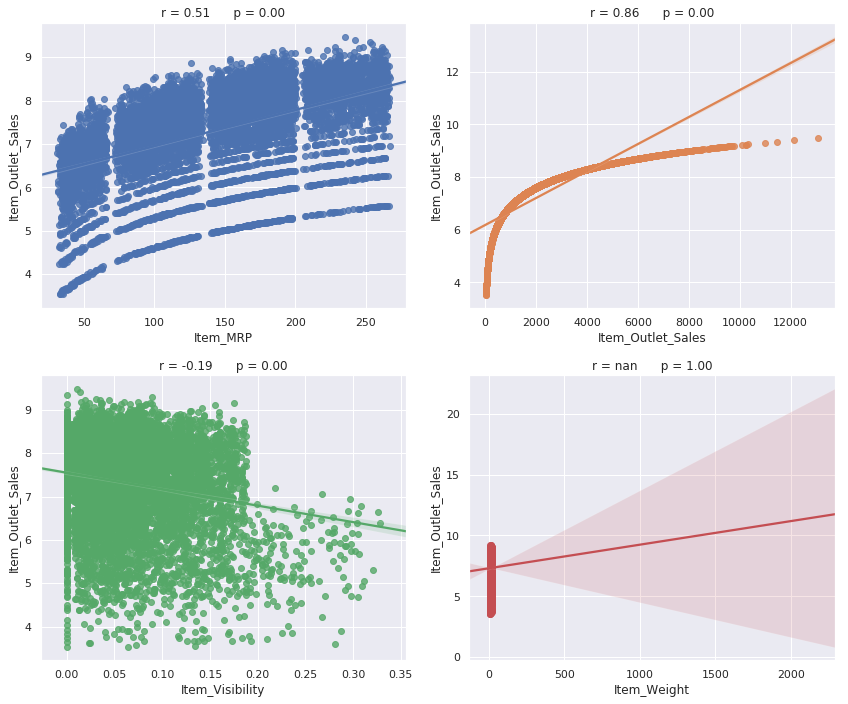

In [247]:
nrows = 2
ncols = 2
k=0
fig,axes = plt.subplots(nrows,ncols,figsize=(12,10))
for i in range(nrows):
    for j in range(ncols):
        x = train.loc[:,numerical_feats[k]]
        cor = stats.pearsonr(x,y_log_sales)
        sns.regplot(x,y_log_sales, ax = axes[i][j])
        str_title = "r = " + "{0:.2f}".format(cor[0]) + "      " "p = " + "{0:.2f}".format(cor[1])
        axes[i][j].set_title(str_title)
        k+=1
plt.tight_layout()

## One Hot Encoding

In [248]:
data_1 = pd.get_dummies(data,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet_Identifier'],drop_first=True)

In [249]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
dtype: object

In [250]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 41 columns):
Item_Identifier                    14204 non-null object
Item_MRP                           14204 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Visibility                    14204 non-null float64
Item_Weight                        14204 non-null float64
Outlet_Establishment_Year          14204 non-null int64
Item_Fat_Content_Low Fat           14204 non-null uint8
Item_Fat_Content_Regular           14204 non-null uint8
Item_Fat_Content_low fat           14204 non-null uint8
Item_Fat_Content_reg               14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 non-null uint8
Item_Type_Frozen Foods             14204 non-null uint8
Item_Type_Fruits and Vegetables    14204 no

In [251]:
data_1.shape

(14204, 41)

In [252]:
data_1.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,1998,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,1987,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [253]:
train = data_1[:n_train]
test = data_1[n_train:]

In [254]:
train.shape

(8523, 41)

In [255]:
test.shape

(5681, 41)

In [256]:
test = test.drop(labels="Item_Outlet_Sales",axis=1).reset_index(drop=True)

In [257]:
train.to_csv('train_modified.csv',index=False)
test.to_csv("test_modified.csv",index=False)

## Modelling

In [268]:
#prepering the dataset
train = pd.read_csv("train_modified.csv") 
test = pd.read_csv('test_modified.csv')

In [269]:
#Display firs five row of dataset
train.head() 

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,1998,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,1987,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [260]:
ID_cols = ['Item_Identifier']
target = ['Item_Outlet_Sales']
var  = ID_cols+target

In [261]:
predictors = [x for x in train.columns if x not in var]

## Linear Regrssion

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [263]:
model = LinearRegression()
cross_score = cross_val_score(model,train[predictors],train[target].values.ravel(),verbose=5,cv=5)

[CV]  ................................................................
[CV] ....................... , score=0.5696065086751032, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.5518457008991198, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.5460377442962757, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.5635434007338802, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.5631702255186583, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [270]:
model.fit(train[predictors],train['Item_Outlet_Sales'].values.ravel()) #Fitting the model
y_test = model.predict(train[predictors])

In [271]:
rmse = metrics.mean_squared_error(train['Item_Outlet_Sales'],y_test) #calculating Mean sqaure error 

Model Report
RMSE : 1126.95
CV Score : Mean- 0.56| Std. - 0.01| Min - 0.55| Max - 0.57


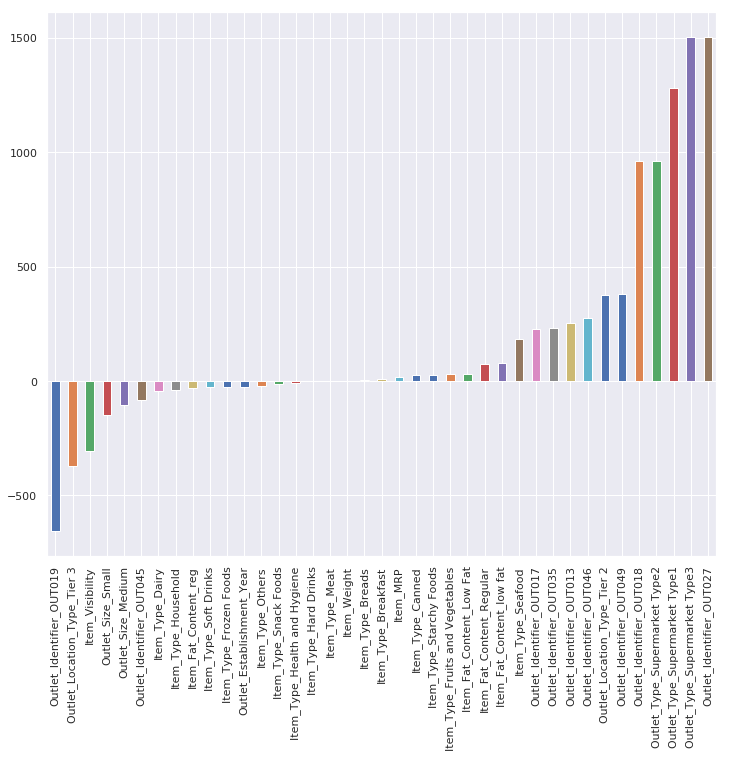

In [272]:
#plotting cofficents
plt.figure(figsize=(12,10))
print('Model Report')
print("RMSE : {:.2f}".format(np.sqrt(rmse)))
print('CV Score : Mean- {0:.2f}| Std. - {1:.2f}| Min - {2:.2f}| Max - {3:.2f}'.format(np.mean(cross_score),np.std(cross_score),np.min(cross_score),np.max(cross_score)))
df = pd.Series(model.coef_,index=predictors).sort_values()
df.plot(kind='bar')

In [274]:
op = model.predict(test[predictors])
test['Target'] = op
test[['Target']].to_csv('Linear',index_label=False)

# Ridge Regression

In [275]:
from sklearn.linear_model import Ridge

In [276]:
ridge = Ridge(alpha=0.05)

In [277]:
ridge.fit(train[predictors],train['Item_Outlet_Sales'].values.ravel())

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [278]:
y_pred = ridge.predict(train[predictors])

In [279]:
rmse = metrics.mean_squared_error(train['Item_Outlet_Sales'].values.ravel(),y_pred)

Model Report
RMSE : 1126.95
CV Score : Mean- 0.56| Std. - 0.01| Min - 0.55| Max - 0.57


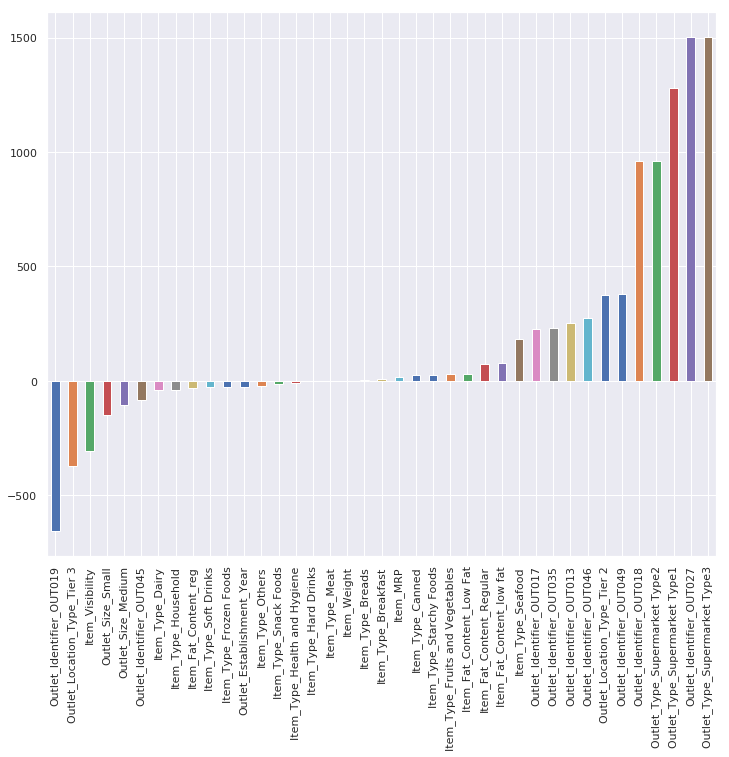

In [280]:
plt.figure(figsize=(12,10))
print('Model Report')
print("RMSE : {:.2f}".format(np.sqrt(rmse)))
print('CV Score : Mean- {0:.2f}| Std. - {1:.2f}| Min - {2:.2f}| Max - {3:.2f}'.format(np.mean(cross_score),np.std(cross_score),np.min(cross_score),np.max(cross_score)))
df = pd.Series(ridge.coef_,index=predictors).sort_values()
df.plot(kind='bar')

In [281]:
op = ridge.predict(test[predictors])

In [282]:
test['Target'] = op

In [283]:
test['Target'].to_csv('ridge',index_label=False)